In [1]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

vggish/embedding:0
vggish/embedding:0
Using cuda device


In [2]:
labels=["Speech","Music","Car","Siren","Vehicle","Wind","Animal","Dog"]
mymodel=trainer(_print=False,_lr=0.01,_labels=labels,
                _classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.25),
                            nn.Sigmoid(),
                            nn.Linear(64,8),
                            nn.Softmax(dim=1)
                            ) )


vggish/embedding:0


In [3]:
mymodel.model.classfilter

Sequential(
  (0): Linear(in_features=128, out_features=64, bias=True)
  (1): Dropout(p=0.25, inplace=False)
  (2): Sigmoid()
  (3): Linear(in_features=64, out_features=8, bias=True)
  (4): Softmax(dim=1)
)

In [4]:
str(mymodel.model.classfilter).replace("\n  ","_")

'Sequential(_(0): Linear(in_features=128, out_features=64, bias=True)_(1): Dropout(p=0.25, inplace=False)_(2): Sigmoid()_(3): Linear(in_features=64, out_features=8, bias=True)_(4): Softmax(dim=1)\n)'

In [5]:
dataloader_dict=get_dataloader_dict(labels,datatype="train",num_data=300)

C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\evalMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\train300AnimalCarDogMusicSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic100Speech100.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusic10Speech10.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSilenceSirenSpeechVehicleWind.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSirenSpeechVehicle.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\trainMusicSpeech.jb']
joblib.loadします
train用データの数：1744
valid用データの数：518


Epoch 1/50
epoch_loss:2.0757779065879602
epoch_corrects:2368.0,epochsize:17435
train Loss: 2.075778 Acc: 0.135819
epoch_loss:2.0697027415831424
epoch_corrects:590.0,epochsize:2589
valid Loss: 2.069703 Acc: 0.227887
Epoch 2/50
epoch_loss:2.0749041572627687
epoch_corrects:2373.0,epochsize:17435
train Loss: 2.074904 Acc: 0.136106
epoch_loss:2.0689442585038607
epoch_corrects:590.0,epochsize:2589
valid Loss: 2.068944 Acc: 0.227887
Epoch 3/50
epoch_loss:2.0740245591954856
epoch_corrects:2400.0,epochsize:17435
train Loss: 2.074025 Acc: 0.137654
epoch_loss:2.0681811672879626
epoch_corrects:592.0,epochsize:2589
valid Loss: 2.068181 Acc: 0.228660
Epoch 4/50
epoch_loss:2.0731447874593774
epoch_corrects:2468.0,epochsize:17435
train Loss: 2.073145 Acc: 0.141554
epoch_loss:2.0674187169198412
epoch_corrects:601.0,epochsize:2589
valid Loss: 2.067419 Acc: 0.232136
Epoch 5/50
epoch_loss:2.072278788549906
epoch_corrects:2582.0,epochsize:17435
train Loss: 2.072279 Acc: 0.148093
epoch_loss:2.06666702080436

epoch_loss:2.047265850378768
epoch_corrects:760.0,epochsize:2589
valid Loss: 2.047266 Acc: 0.293550
Epoch 40/50
epoch_loss:2.0479339495544826
epoch_corrects:5537.0,epochsize:17435
train Loss: 2.047934 Acc: 0.317580
epoch_loss:2.046857495435005
epoch_corrects:760.0,epochsize:2589
valid Loss: 2.046857 Acc: 0.293550
Epoch 41/50
epoch_loss:2.0473977695538386
epoch_corrects:5569.0,epochsize:17435
train Loss: 2.047398 Acc: 0.319415
epoch_loss:2.046456639257441
epoch_corrects:758.0,epochsize:2589
valid Loss: 2.046457 Acc: 0.292777
Epoch 42/50
epoch_loss:2.047021582094482
epoch_corrects:5527.0,epochsize:17435
train Loss: 2.047022 Acc: 0.317006
epoch_loss:2.0460605776047514
epoch_corrects:756.0,epochsize:2589
valid Loss: 2.046061 Acc: 0.292005
Epoch 43/50
epoch_loss:2.0464871625760788
epoch_corrects:5593.0,epochsize:17435
train Loss: 2.046487 Acc: 0.320792
epoch_loss:2.0456722825592943
epoch_corrects:756.0,epochsize:2589
valid Loss: 2.045672 Acc: 0.292005
Epoch 44/50
epoch_loss:2.04602983553771

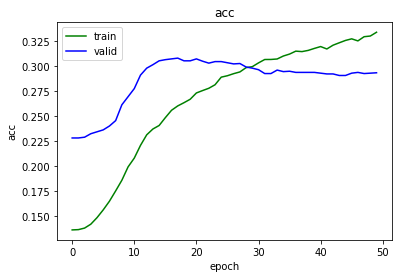

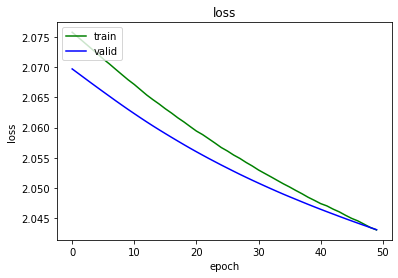

In [6]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=50)
mymodel.graph()

In [7]:

mymodel.saveModel(addname="savetest")


In [8]:
#mymodel.loadModel(addname="savetest")